__The following table presents data collected in one of Galileo’s
famous “ball” experiments, in which he rolled a ball down a ramp
of different heights and measured how far it traveled from the
base of the ramp. For more on this and other interesting examples,
look at “Teaching Statistics with Data of Historic Significance” by
Dickey and Arnold (1995).__

__a.__
Create a data frame in R based on this table and plot the data
points with distance on the y-axis.

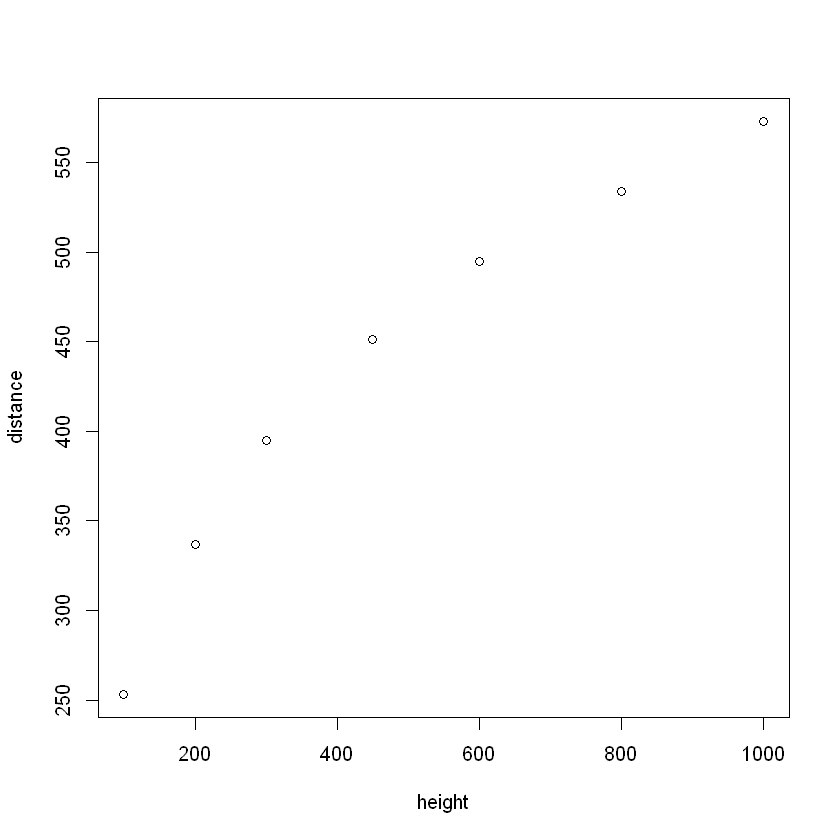

In [2]:
height = c(1000, 800, 600, 450, 300, 200, 100)
distance = c(573, 534, 495, 451, 395, 337, 253)
table = data.frame(height, distance)
plot(distance ~ height, data = table)

__b.__ Galileo believed there was a quadratic relationship between
initial height and the distance traveled. <br>
i. Fit an order 2 polynomial in height, with distance as the
response.<br>
ii. Fit a cubic (order 3) and a quartic (order 4) model for
these data. What do they tell you about the nature of the
relationship?


Call:
lm(formula = distance ~ height + I(height^2), data = table)

Residuals:
      1       2       3       4       5       6       7 
  8.458 -12.607  -6.177   1.940  13.523   9.170 -14.308 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.999e+02  1.676e+01  11.928 0.000283 ***
height       7.083e-01  7.482e-02   9.467 0.000695 ***
I(height^2) -3.437e-04  6.678e-05  -5.147 0.006760 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.64 on 4 degrees of freedom
Multiple R-squared:  0.9903,	Adjusted R-squared:  0.9855 
F-statistic:   205 on 2 and 4 DF,  p-value: 9.333e-05


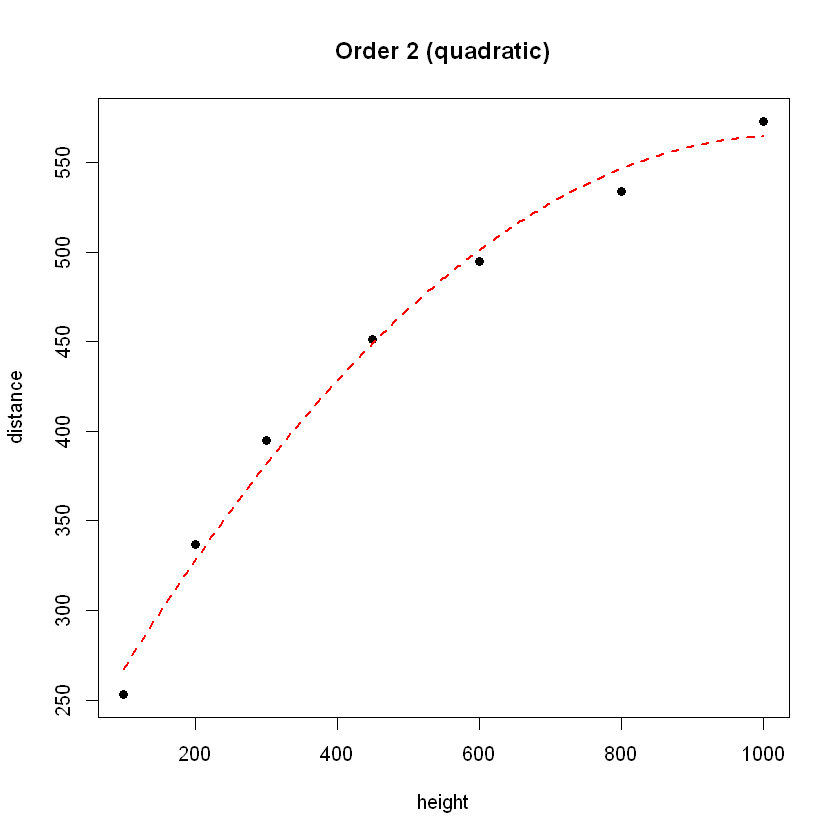

In [31]:
distance.order2 = lm(distance ~ height + I(height^2), data = table)
summary(distance.order2)
coeff = coefficients(distance.order2) 

plot(distance ~ height, data = table, pch = 16, main = "Order 2 (quadratic)")

disp.seq = seq(min(table$height), max(table$height), length=300) 
distance.order2.pred = coeff[1] + disp.seq*coeff[2] + coeff[3]*(disp.seq^2)

lines(disp.seq,distance.order2.pred, lwd = 2, lty=2, col = "red")




Call:
lm(formula = distance ~ height + I(height^2) + I(height^3), data = table)

Residuals:
       1        2        3        4        5        6        7 
-0.84138  2.32159 -0.08044 -4.46885  1.89175  3.58091 -2.40359 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.558e+02  8.326e+00  18.710 0.000333 ***
height       1.115e+00  6.567e-02  16.983 0.000445 ***
I(height^2) -1.245e-03  1.384e-04  -8.994 0.002902 ** 
I(height^3)  5.477e-07  8.327e-08   6.577 0.007150 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.011 on 3 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9987 
F-statistic:  1595 on 3 and 3 DF,  p-value: 2.662e-05


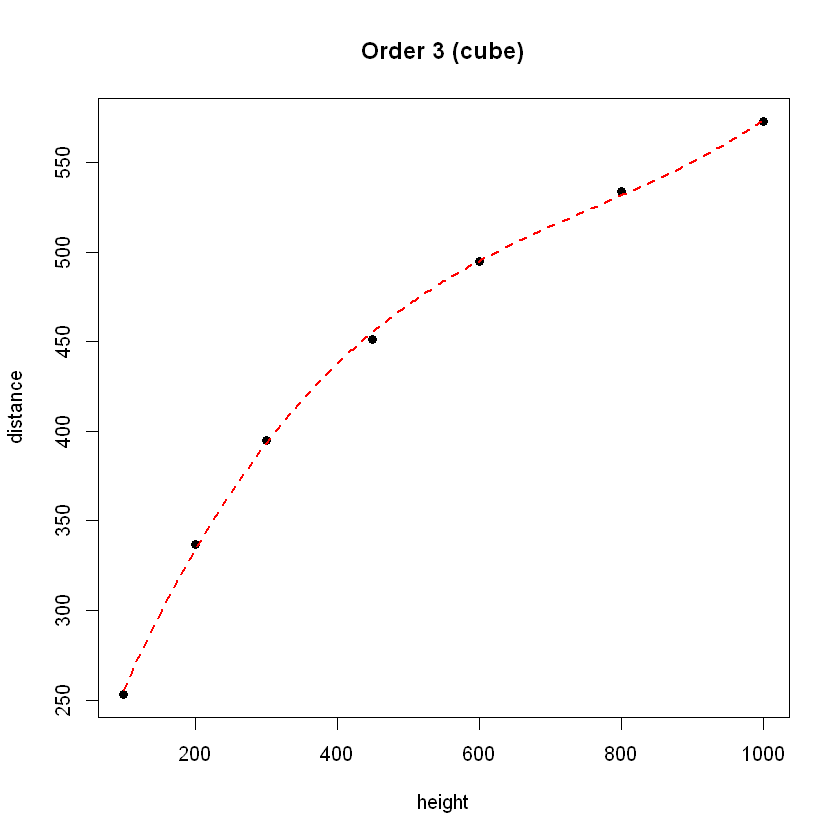

In [32]:
distance.order3 = lm(distance ~ height + I(height^2) + I(height^3), data = table)
summary(distance.order3)
coeff = coefficients(distance.order3) 

plot(distance ~ height, data = table, pch = 16, main = "Order 3 (cube)")

disp.seq = seq(min(table$height), max(table$height), length=300) 
distance.order3.pred = coeff[1] + disp.seq*coeff[2] + coeff[3]*(disp.seq^2) + coeff[4]*(disp.seq^3)

lines(disp.seq,distance.order3.pred, lwd = 2, lty=2, col = "red")



__c.__ Based on your models from (b), choose the one that you think
best represents the data and plot the fitted line on the raw data.
Add 90 percent confidence bands for mean distance traveled to
the plot.

In [33]:
disp.seq = seq(min(table$height), max(table$height), length=300) 
predict.band = predict(distance.order3, newdata = data.frame(height = disp.seq ), interval = "prediction", level = 0.90)

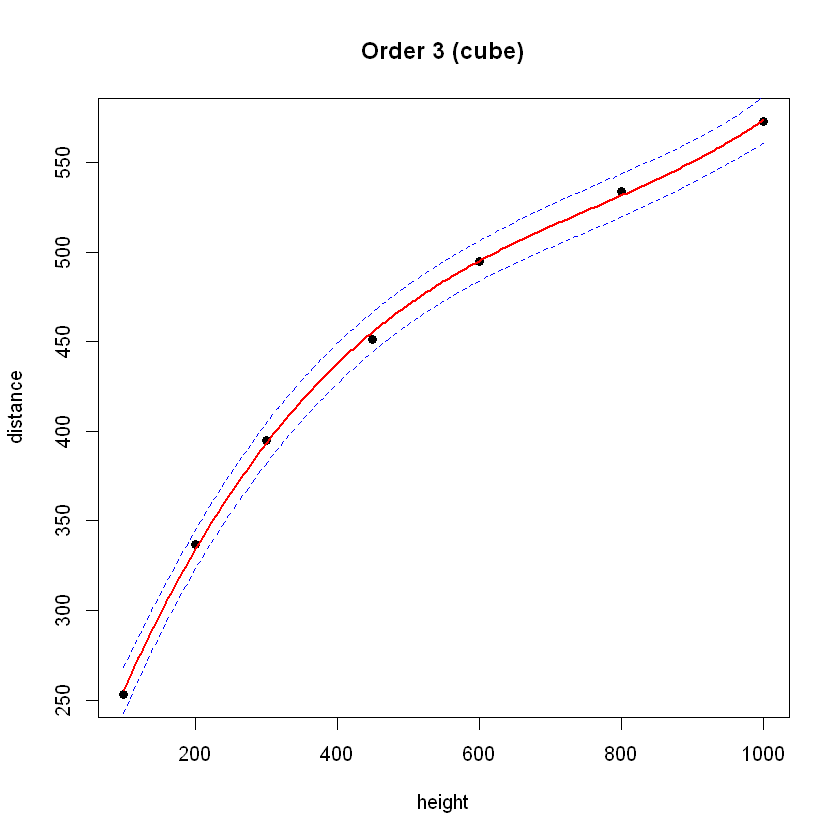

In [38]:
plot(distance ~ height, data = table, pch = 16, main = "Order 3 (cube)")

distance.order3.pred = coeff[1] + disp.seq*coeff[2] + coeff[3]*(disp.seq^2) + coeff[4]*(disp.seq^3)

lines(disp.seq,distance.order3.pred, lwd = 2, col = "red")
lines(disp.seq, predict.band[,2], col = "blue", lty = 2)
lines(disp.seq, predict.band[,3], col = "blue", lty = 2)

__ The contributed R package faraway contains a large number of data
sets that accompany a linear regression textbook by Faraway (2005).
Install the package and then call library("faraway") to load it. One of
the data sets is trees, which provides data on the dimensions of felled
trees of a certain type (see, for example, Atkinson, 1985) __

__d.__ Access the data object at the prompt and plot volume against
girth (the latter along the x-axis).


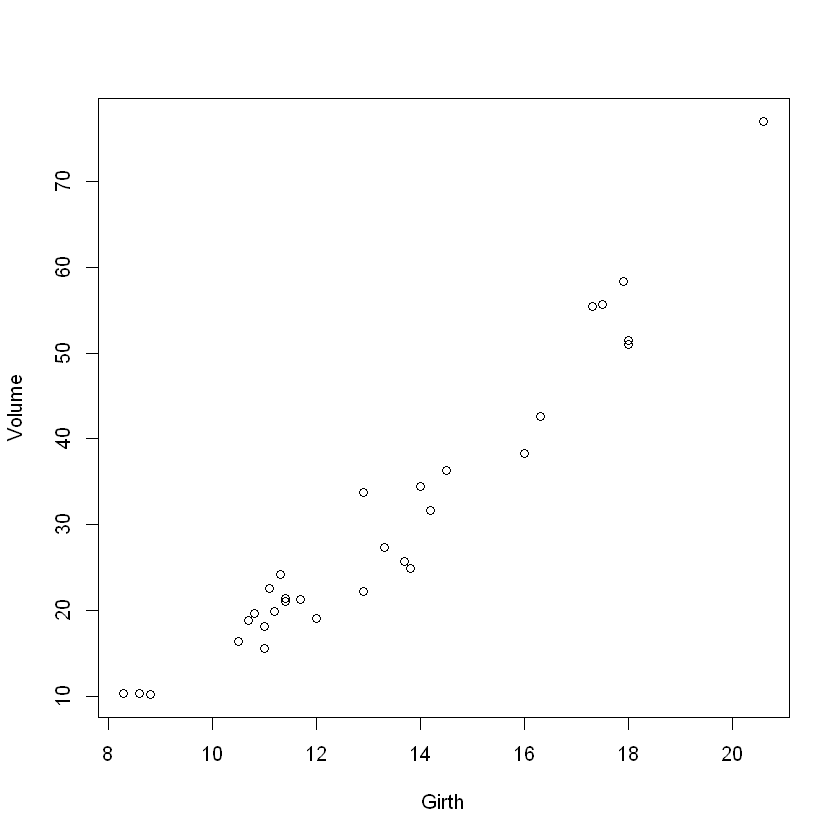

In [41]:
library("faraway")
plot(Volume ~ Girth, data = trees)

__e.__ Fit two models with Volume as the response: one quadratic model
in Girth and the other based on log transformations of both
Volume and Girth. Write down the model equations for each and
comment on the similarity (or difference) of the fits in terms of
the coefficient of determination and the omnibus F-test. <br><br>
__f.__Use predict to add lines to the plot from (d) for each of the two
models from (e). Use different line types; add a corresponding
legend. Also include 95 percent prediction intervals, with line
types matching those of the fitted values (note that for the model
that involves log transformation of the response and the predictor, any returned values from predict will themselves be on the
log scale; you have to back-transform these to the original scale using exp before the lines for that model can be superimposed).
Comment on the respective fits and their estimated prediction
intervals.

In [49]:
quadatic = lm(Volume ~ Girth + I(Girth^2), data = trees)
quadatic
summary(quadatic)


Call:
lm(formula = Volume ~ Girth + I(Girth^2), data = trees)

Coefficients:
(Intercept)        Girth   I(Girth^2)  
    10.7863      -2.0921       0.2545  



Call:
lm(formula = Volume ~ Girth + I(Girth^2), data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4889 -2.4293 -0.3718  2.0764  7.6447 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78627   11.22282   0.961 0.344728    
Girth       -2.09214    1.64734  -1.270 0.214534    
I(Girth^2)   0.25454    0.05817   4.376 0.000152 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.335 on 28 degrees of freedom
Multiple R-squared:  0.9616,	Adjusted R-squared:  0.9588 
F-statistic: 350.5 on 2 and 28 DF,  p-value: < 2.2e-16


In [48]:
M = summary(aov(quadatic))
M

            Df Sum Sq Mean Sq F value   Pr(>F)    
Girth        1   7582    7582  681.77  < 2e-16 ***
I(Girth^2)   1    213     213   19.15 0.000152 ***
Residuals   28    311      11                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [51]:
R2 = summary(quadatic)$r.squared
n = nrow(trees)
p = length(coef(quadatic))-1
Fstat = (R2*(n-p-1))/((1-R2)*p)
Fstat
1-pf(Fstat,df1=p,df2=n-p-1)

[1] 350.4563

[1] 0

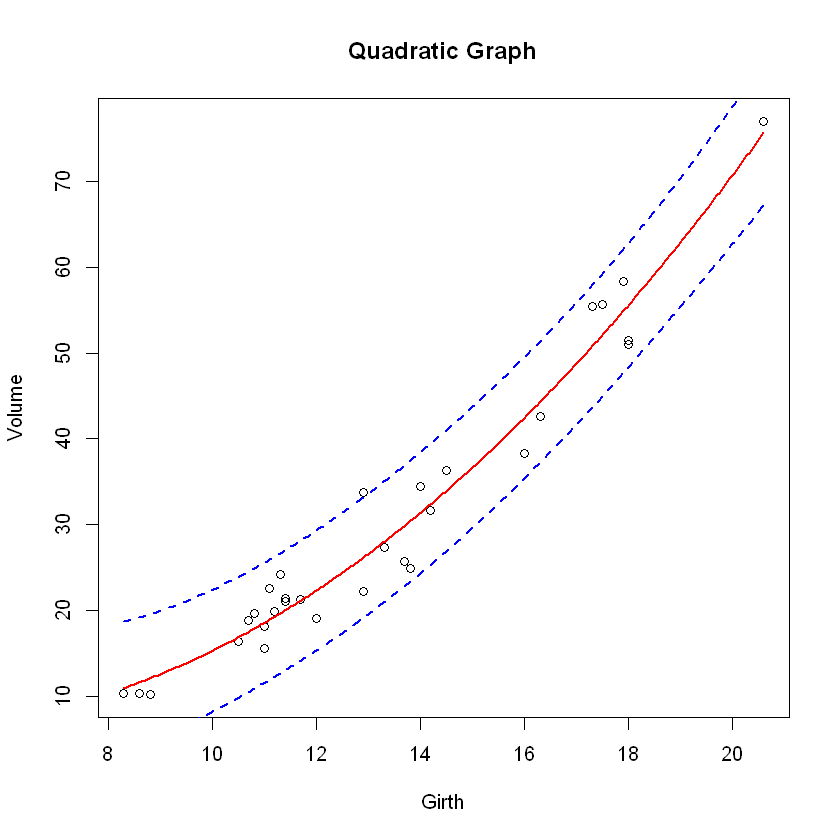

In [98]:
coeff = coefficients(quadatic)

xvals = seq(min(trees$Girth), max(trees$Girth), length=300) 
yvals = coeff[1] + coeff[2]*xvals + coeff[3]*xvals^2

predict.band = predict(quadatic, newdata = data.frame(Girth = xvals ), interval = "prediction", level = 0.95)

plot(Volume ~ Girth, data = trees, main = "Quadratic Graph")

lines(xvals, yvals, lwd = 2, col = "red")
lines(xvals, predict.band[,2], lwd = 2, lty = 2, col = "blue")
lines(xvals, predict.band[,3], lwd = 2, lty = 2, col = "blue")

In [107]:
volume.log = lm(log(Volume) ~ log(Girth), data = trees)
summary(volume.log)


Call:
lm(formula = log(Volume) ~ log(Girth), data = trees)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.205999 -0.068702  0.001011  0.072585  0.247963 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.35332    0.23066  -10.20 4.18e-11 ***
log(Girth)   2.19997    0.08983   24.49  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.115 on 29 degrees of freedom
Multiple R-squared:  0.9539,	Adjusted R-squared:  0.9523 
F-statistic: 599.7 on 1 and 29 DF,  p-value: < 2.2e-16


In [108]:
R2 = summary(volume.log)$r.squared
n = nrow(trees)
p = length(coef(volume.log))-1
Fstat = (R2*(n-p-1))/((1-R2)*p)
Fstat
1-pf(Fstat,df1=p,df2=n-p-1)

[1] 599.7174

[1] 0

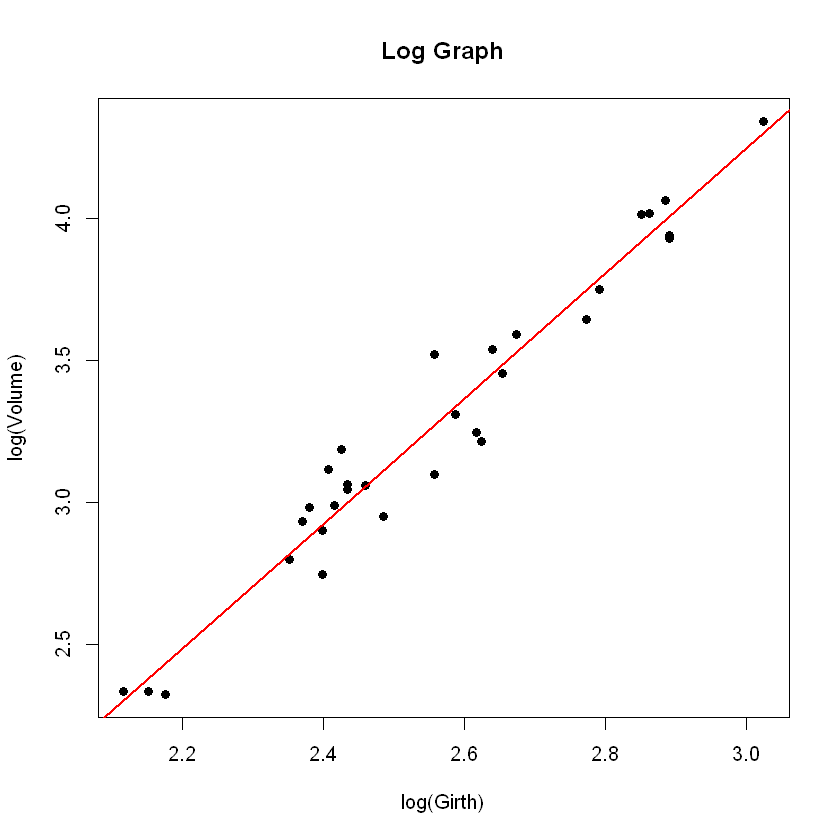

In [109]:
coeff = coefficients(volume.log)
xvals = seq(min(log(trees$Girth)-50), max(log(trees$Girth)+50), length=300) 
yvals = coeff[1] + xvals*coeff[2]

plot(log(Volume) ~ log(Girth), data = trees, pch = 16, main = "Log Graph")
lines(xvals, yvals, lwd = 2, col = "red")


__Lastly, turn your attention back to the mtcars data frame.__ <br>
__g.__ Fit and summarize a multiple linear regression model to deter
mine mean MPG from horsepower, weight, and displacement.<br>
__h.__ In the spirit of Henderson and Velleman (1981), use I to refit
the model in (g) in terms of GPM = 1/MPG. Which model
explains a greater amount of variation in the response?

In [118]:
library(MASS)
mpg.linear = lm(mpg ~ hp + wt + disp, data = mtcars)
mpg.linear
summary(mpg.linear)



Call:
lm(formula = mpg ~ hp + wt + disp, data = mtcars)

Coefficients:
(Intercept)           hp           wt         disp  
  37.105505    -0.031157    -3.800891    -0.000937  



Call:
lm(formula = mpg ~ hp + wt + disp, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.891 -1.640 -0.172  1.061  5.861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.105505   2.110815  17.579  < 2e-16 ***
hp          -0.031157   0.011436  -2.724  0.01097 *  
wt          -3.800891   1.066191  -3.565  0.00133 ** 
disp        -0.000937   0.010350  -0.091  0.92851    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.639 on 28 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8083 
F-statistic: 44.57 on 3 and 28 DF,  p-value: 8.65e-11


In [119]:
mpg.linear.gpm = lm(1/mpg ~ hp + wt + disp, data = mtcars)
mpg.linear.gpm
summary(mpg.linear.gpm)


Call:
lm(formula = 1/mpg ~ hp + wt + disp, data = mtcars)

Coefficients:
(Intercept)           hp           wt         disp  
  9.496e-03    5.864e-05    9.469e-03    2.456e-05  



Call:
lm(formula = 1/mpg ~ hp + wt + disp, data = mtcars)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0163719 -0.0043511  0.0008672  0.0032544  0.0133345 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 9.496e-03  5.322e-03   1.784  0.08521 . 
hp          5.864e-05  2.883e-05   2.034  0.05155 . 
wt          9.469e-03  2.688e-03   3.522  0.00149 **
disp        2.456e-05  2.609e-05   0.941  0.35472   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.006653 on 28 degrees of freedom
Multiple R-squared:  0.8518,	Adjusted R-squared:  0.8359 
F-statistic: 53.63 on 3 and 28 DF,  p-value: 9.94e-12
